In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [4]:
dataset = pd.read_csv('data.csv', header=None)

In [5]:
dataset.head()

,0,1,2
0,18,204,0
1,2,192,0
2,0,172,0
3,-29,165,0
4,-18,180,0


In [6]:
X = dataset.iloc[:,:2].values
y = dataset.iloc[:,-1].values

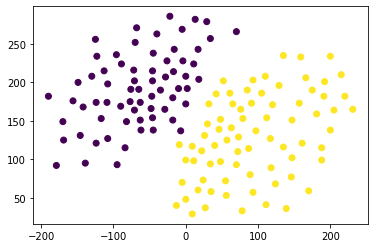

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
def draw_svm(X,y,C=1.0):
    plt.scatter(X[:,0],X[:,1],c=y)
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X,y)
    
    # gca - get current axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create meshgrid
    x1 = np.linspace(xlim[0], xlim[1], 200)
    x2 = np.linspace(ylim[0], ylim[1], 200)
    
    xx,yy = np.meshgrid(x1, x2)
    x = np.vstack([xx.flatten(), yy.flatten()]).T
    z = clf.decision_function(x).reshape(xx.shape)
    
    # Plot the boundary
    ax.contour(xx,yy,z,colors='k', levels = [-1,0,1], alpha = 0.5,
               linestyles = ['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:,0],
              clf.support_vectors_[:,1],
              s = 100, linewidth=1)
    plt.show()
    return clf_fit

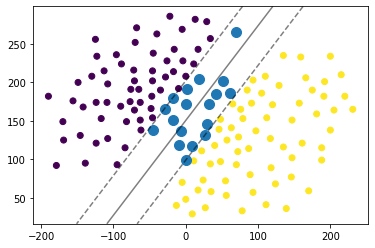

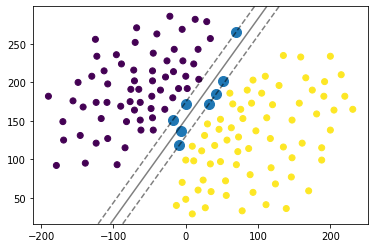

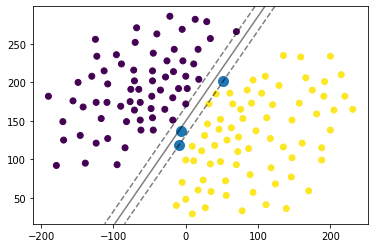

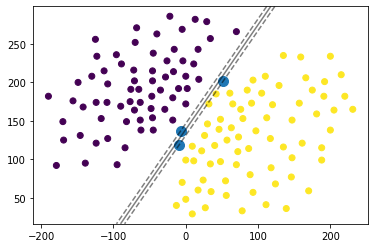

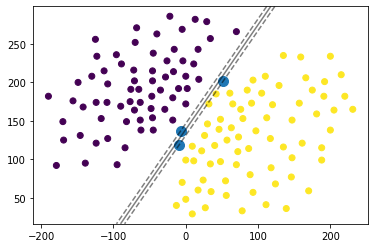

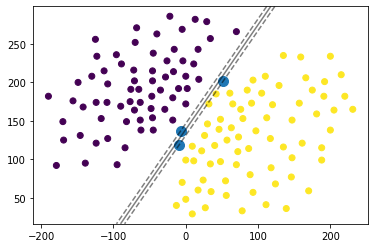

0.9929078014184397
0.9929078014184397
0.9929078014184397
1.0
1.0
1.0


In [10]:
clf_arr = []
clf_arr.append(draw_svm(X,y,0.0001))
clf_arr.append(draw_svm(X,y,0.001))
clf_arr.append(draw_svm(X,y,0.01))
clf_arr.append(draw_svm(X,y,0.1))
clf_arr.append(draw_svm(X,y,1))
clf_arr.append(draw_svm(X,y,10))

for i, clf in enumerate(clf_arr):
    print(clf.score(X,y))
